<a href="https://colab.research.google.com/github/Akashsindhu/MNIST/blob/master/part1_Project_Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A ConvNet is able to successfully capture the Spatial and Temporal dependencies in an image through the application of relevant filters.

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# download the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


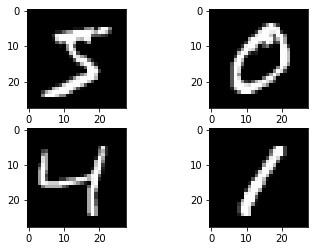

In [2]:
# plot 4 images as grayscale 
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.show()

we can achieve good accuracy and error rate of 1.74% with baseline neural network. we will use this to compare with CNN.

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.utils import np_utils

seed = 7
np.random.seed(seed)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [0]:
# flatten 28x28 images to 784 vector for each image 
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype(float)

x_test = x_test.reshape(x_test.shape[0], num_pixels).astype(float)

In [0]:
# normalize the pixel values from 0-255 to 0-1
x_train = x_train/255
x_test = x_test/255


In [6]:
# when 1D array use np_utils instead of onehotencoding 
# reference: https://stackoverflow.com/questions/41494625/issues-using-keras-np-utils-to-categorical
# output variable are integer from 0 to 9 so, we need to convert them in 0 and 1 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_test.shape)
num_classes = y_test.shape[1]
print(num_classes)
# print(y_train)
# print(y_test)

(10000, 10)
10


In [0]:
def baseline_model():
  model = Sequential()
  model.add(Dense(num_pixels, input_dim = num_pixels, kernel_initializer='normal', activation='relu'))
  model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model 



In [9]:
model = baseline_model()
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
loss, accu = model.evaluate(x_test, y_test, verbose = 2)
print("Baseline accuracy: %.2f%%" % (accu*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.2793 - acc: 0.9190 - val_loss: 0.1427 - val_acc: 0.9590
Epoch 2/10
 - 1s - loss: 0.1097 - acc: 0.9680 - val_loss: 0.0930 - val_acc: 0.9720
Epoch 3/10
 - 1s - loss: 0.0708 - acc: 0.9797 - val_loss: 0.0770 - val_acc: 0.9764
Epoch 4/10
 - 1s - loss: 0.0499 - acc: 0.9851 - val_loss: 0.0707 - val_acc: 0.9779
Epoch 5/10
 - 1s - loss: 0.0360 - acc: 0.9895 - val_loss: 0.0675 - val_acc: 0.9790
Epoch 6/10
 - 1s - loss: 0.0250 - acc: 0.9934 - val_loss: 0.0658 - val_acc: 0.9792
Epoch 7/10
 - 1s - loss: 0.0193 - acc: 0.9949 - val_loss: 0.0589 - val_acc: 0.9799
Epoch 8/10
 - 1s - loss: 0.0144 - acc: 0.9966 - val_loss: 0.0567 - val_acc: 0.9823
Epoch 9/10
 - 1s - loss: 0.0117 - acc: 0.9973 - val_loss: 0.0654 - val_acc: 0.9809
Epoch 10/10
 - 1s - loss: 0.0079 - acc: 0.9985 - val_loss: 0.0575 - val_acc: 0.9824
Baseline accuracy: 98.24%
